# 4.7 Lab: Logistic Regression, LDA, QDA, and KNN

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## 4.6.1 The Stock Market Data

In [2]:
data = pd.read_csv('~/Google Drive/Coding/ISLR2/datasets/Smarket.csv')
data.index = data.index + 1
print(data.shape)
data.head()

(1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
data.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [4]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [5]:
corr = data.corr()
corr

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


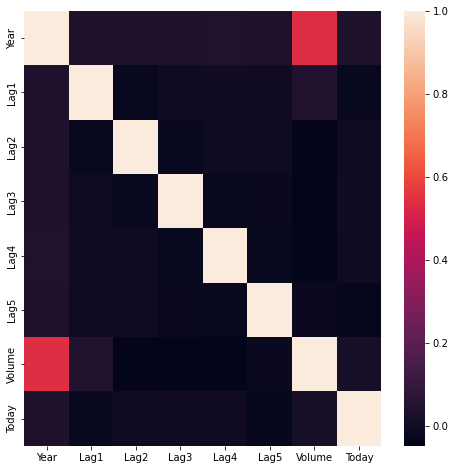

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(corr);

The only significant correlation appears to be between Year and Volume

In [7]:
corr.iloc[:,-2].to_frame()

,Volume
Year,0.539006
Lag1,0.040910
Lag2,-0.043383
Lag3,-0.041824
Lag4,-0.048414
Lag5,-0.022002
Volume,1.000000
Today,0.014592


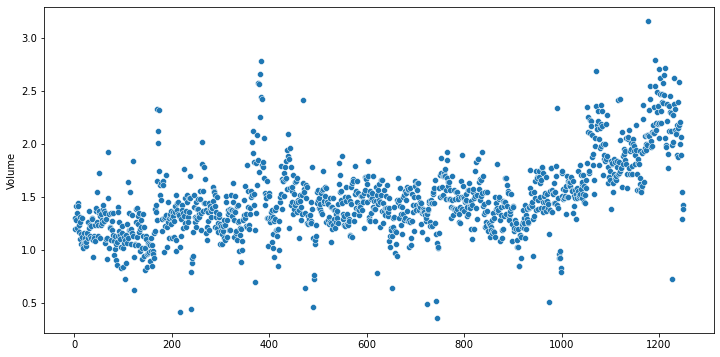

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data.index, y=data['Volume']);

## 4.6.2 Logistic Regression

In [9]:
# Keep a copy of the original data intact so we can manipulate the data
data_orig = data.copy()

In [10]:
data['Direction'] = data['Direction'].map({'Down':0, 'Up':1})

In [11]:
logit = smf.logit(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data = data).fit()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


In [12]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:                0.002074
Time:                        23:33:57   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [13]:
logit.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [14]:
logit.pvalues

Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [15]:
print(dir(logit))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generalized', 'resid_pearson', 'resid_response', 'save', 'scale', 'set_null_options', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'use_t', 'wald_t

In [16]:
X = data.iloc[:, 1:-2]
X = sm.add_constant(X)

# Probability that the given observation will result in 'UP'
prob = logit.predict(X)[:10]
print(list(prob))

predicted_classes = np.where(prob <= 0.5, 'Down', 'Up')
pd.DataFrame({"Probabilities":prob, 'Classes':predicted_classes})

[0.5070841334630001, 0.48146787817516973, 0.4811388348131379, 0.5152223557927659, 0.5107811625911515, 0.5069564604552573, 0.49265087386752915, 0.5092291581449722, 0.5176135261687921, 0.4888377794207711]


,Probabilities,Classes
1,0.507084,Up
2,0.481468,Down
3,0.481139,Down
4,0.515222,Up
5,0.510781,Up
6,0.506956,Up
7,0.492651,Down
8,0.509229,Up
9,0.517614,Up
10,0.488838,Down


In [17]:
# Using Sklearn
X = data.iloc[:, 1:-2]
y = data['Direction']
lr = LogisticRegression(C=1e9).fit(X, y) # Large C for no regularization
lr_preds = lr.predict(X)
lr.intercept_, lr.coef_

(array([-0.12600781]),
 array([[-0.07307339, -0.04230074,  0.01108552,  0.00935968,  0.01031339,
          0.13544567]]))

In [18]:
# Prediction Summary
pd.DataFrame({"prob_0": lr.predict_proba(X)[:, 0],
              "prob_1": lr.predict_proba(X)[:, 1],
              "pred_class": lr_preds})

,prob_0,prob_1,pred_class
0,0.492916,0.507084,1
1,0.518533,0.481467,0
2,0.518861,0.481139,0
3,0.484778,0.515222,1
4,0.489219,0.510781,1
...,...,...,...
1245,0.480107,0.519893,1
1246,0.494075,0.505925,1
1247,0.460732,0.539268,1
1248,0.473882,0.526118,1


In [19]:
# Confusion Matrix and Accuracy 

conf_m = pd.DataFrame(confusion_matrix(y, lr_preds).T,
                      columns = ['Down', 'Up'],
                      index = ['Down', 'Up'])
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,Down,Up
True,,
Down,145,141
Up,457,507


In [20]:
acc_score = accuracy_score(y, lr_preds)
print('Accuracy: ' + str(acc_score))
print('Training Error: ' + str(1 - acc_score))

Accuracy: 0.5216
Training Error: 0.47840000000000005


In [21]:
# Separate training and test sets
train = data.loc[data['Year']<2005]
smarket_2005 = data.loc[data['Year'] >= 2005]

In [22]:
X_sk_train = train.loc[:, 'Lag1':'Volume']
y_sk_train = train.loc[:, 'Direction']

X_sk_test = smarket_2005.loc[:, 'Lag1':'Volume']
y_sk_test = smarket_2005.loc[:, 'Direction']

lr_model_t = LogisticRegression(C=1e9) # Large C for no regularization
lr_fit_t = lr_model_t.fit(X_sk_train, y_sk_train)

In [23]:
lr_fit_proba = lr_fit_t.predict_proba(X_sk_test)
lr_fit_pred = lr_fit_t.predict(X_sk_test)

pd.DataFrame({"prob_0":lr_fit_proba[:, 0],
              "prob_1":lr_fit_proba[:, 1],
              "pred_class":lr_fit_pred})

,prob_0,prob_1,pred_class
0,0.471780,0.528220,1
1,0.484332,0.515668,1
2,0.477348,0.522652,1
3,0.486146,0.513854,1
4,0.501665,0.498335,0
...,...,...,...
247,0.516363,0.483637,0
248,0.493951,0.506049,1
249,0.483342,0.516658,1
250,0.483876,0.516124,1


In [24]:
conf_m_t = pd.DataFrame(confusion_matrix(y_sk_test, lr_fit_pred).T,
                        index=['Down', 'Up'],
                        columns=['Down', 'Up'])
conf_m_t.columns.name = 'Predicted'
conf_m_t.index.name = 'True'
conf_m_t

Predicted,Down,Up
True,,
Down,77,97
Up,34,44


In [25]:
acc_score_t = accuracy_score(y_sk_test, lr_fit_pred)

print(F"Accuracy: {acc_score_t}")
print(F"Training Error: {1-acc_score_t}")

Accuracy: 0.4801587301587302
Training Error: 0.5198412698412698


In [26]:
X_sk_train_s = train.loc[:, 'Lag1':'Lag2']
y_sk_train_s = train.loc[:, 'Direction']

X_sk_test_s = smarket_2005.loc[:, 'Lag1':'Lag2']
y_sk_test_s = smarket_2005.loc[:, 'Direction']

lr_model_s = LogisticRegression(C=1e9)
lr_fit_s = lr_model_s.fit(X_sk_train_s, y_sk_train_s)

In [27]:
lr_fit_s_proba = lr_fit_s.predict_proba(X_sk_test_s)
lr_fit_s_preds = lr_fit_s.predict(X_sk_test_s)

pd.DataFrame({"prob_0":lr_fit_s_proba[:, 0],
              "prob_1":lr_fit_s_proba[:, 1],
              "pred_class":lr_fit_s_preds})

,prob_0,prob_1,pred_class
0,0.490173,0.509827,1
1,0.479180,0.520820,1
2,0.466737,0.533263,1
3,0.473935,0.526065,1
4,0.492784,0.507216,1
...,...,...,...
247,0.500615,0.499385,0
248,0.497239,0.502761,1
249,0.479163,0.520837,1
250,0.483129,0.516871,1


In [28]:
conf_m_s = pd.DataFrame(confusion_matrix(y_sk_test_s, lr_fit_s_preds).T,
                        index = ['Down', 'Up'],
                        columns = ['Down', 'Up'])
conf_m_s.index.name = "True"
conf_m_s.columns.name = 'Predicted'
conf_m_s

Predicted,Down,Up
True,,
Down,35,35
Up,76,106


In [29]:
acc_score_s = accuracy_score(y_sk_test_s, lr_fit_s_preds)

print(F"Accuracy: {acc_score_s}")
print(F"Training Error: {1-acc_score_s}")

Accuracy: 0.5595238095238095
Training Error: 0.44047619047619047


In [30]:
# Predictions for arbitrary data

predict_data = pd.DataFrame({"Lag1": [1.2, 1.5], "Lag2": [1.1, -0.8]})

lr_fit_s.predict_proba(predict_data)[:, 1]

array([0.47914604, 0.49611109])

## 4.6.3 Linear Discriminant Analysis

In [31]:
X_train = train.loc[:, 'Lag1':'Lag2']
y_train = train.loc[:, 'Direction']

X_test = smarket_2005.loc[:, 'Lag1':'Lag2']
y_test = smarket_2005.loc[:, 'Direction']

lda_model = LDA()
lda_fit = lda_model.fit(X_train, y_train)

In [32]:
lda_fit.priors_ # group priors

array([0.49198397, 0.50801603])

In [33]:
lda_fit.means_ # group means

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [34]:
lda_fit.scalings_ # coefficients of ld

array([[-0.64201904],
       [-0.51352928]])

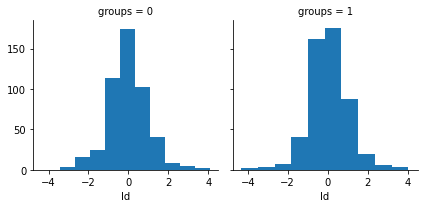

In [35]:
# For plotting LDA, needs improvement
ld_sc = X_train.iloc[:, 0] * lda_fit.scalings_[0] + X_train.iloc[:, 1] * lda_fit.scalings_[1]

ld = pd.DataFrame({'groups':y_train, 'ld': ld_sc})

g = sns.FacetGrid(ld, col='groups')
g.map(plt.hist, 'ld');

In [36]:
# prediction summary
lda_fit_proba = lda_fit.predict_proba(X_test)
lda_fit_preds = lda_fit.predict(X_test)

pd.DataFrame({"prob_0":lda_fit_proba[:, 0],
              "prob_1":lda_fit_proba[:, 1],
              "pred_class":lda_fit_preds})

,prob_0,prob_1,pred_class
0,0.490179,0.509821,1
1,0.479218,0.520782,1
2,0.466818,0.533182,1
3,0.474001,0.525999,1
4,0.492788,0.507212,1
...,...,...,...
247,0.500589,0.499411,0
248,0.497221,0.502779,1
249,0.479199,0.520801,1
250,0.483167,0.516833,1


In [37]:
conf_m_lda = pd.DataFrame(confusion_matrix(y_test, lda_fit_preds).T,
                          index=['Down', 'Up'],
                          columns=['Down', 'Up'])
conf_m_lda.index.name = 'True'
conf_m_lda.columns.name = 'Predicted'
conf_m_lda

Predicted,Down,Up
True,,
Down,35,35
Up,76,106


In [38]:
sum(lda_fit_proba[:,0]>0.5)

70

In [39]:
sum(lda_fit_proba[:,0]<=0.5)

182

In [40]:
sum(lda_fit_proba[:,0]>0.9)

0

## 4.7.4 Quadratic Discriminant Analysis

In [41]:
qda_model = QDA()
qda_fit = qda_model.fit(X_train, y_train)

In [42]:
qda_fit.priors_ # group priors

array([0.49198397, 0.50801603])

In [43]:
qda_fit.means_ # group means

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [44]:
qda_fit.scalings_ # coefficients of qd

[array([1.56294495, 1.47927279]), array([1.53455065, 1.47272326])]

In [45]:
qda_fit_proba = qda_fit.predict_proba(X_test)
qda_fit_preds = qda_fit.predict(X_test)

pd.DataFrame({'prob_0':qda_fit_proba[:, 0],
              'prob_1':qda_fit_proba[:, 1],
              'pred_class':qda_fit_preds})

,prob_0,prob_1,pred_class
0,0.487324,0.512676,1
1,0.475901,0.524099,1
2,0.463691,0.536309,1
3,0.473925,0.526075,1
4,0.490343,0.509657,1
...,...,...,...
247,0.497670,0.502330,1
248,0.494787,0.505213,1
249,0.475864,0.524136,1
250,0.482695,0.517305,1


In [46]:
conf_m_qda = pd.DataFrame(confusion_matrix(y_test, qda_fit_preds).T,
                          index=['Down', 'Up'],
                          columns=['Down', 'Up'])
conf_m_qda.index.name = 'True'
conf_m_qda.columns.name = 'Predicted'
conf_m_qda

Predicted,Down,Up
True,,
Down,30,20
Up,81,121


In [47]:
acc_score_qda = accuracy_score(y_test, qda_fit_preds)

print(F"Accuracy: {acc_score_qda}")
print(F"Test Error: {1-acc_score_qda}")

Accuracy: 0.5992063492063492
Test Error: 0.4007936507936508


## 4.7.5 Naive Bayes - New to ISLR v2

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gnb_model = GaussianNB()
gnb_fit = gnb_model.fit(X_train, y_train)

In [50]:
gnb_fit.class_prior_ # A-priori probabilities

array([0.49198397, 0.50801603])

In [51]:
gnb_fit.theta_ # group means

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [52]:
gnb_fit.var_**.5 # group std dev

array([[1.22619505, 1.23792871],
       [1.23045262, 1.21956089]])

In [53]:
lag1_down_mean = X_train[y_train==0]['Lag1'].mean()
lag1_down_sd = X_train[y_train==0]['Lag1'].std()

print(F"Mean Lag1 values for training data that had down direction: {lag1_down_mean}")
print(F"SD Lag1 values for training data that had down direction: {lag1_down_sd}")

Mean Lag1 values for training data that had down direction: 0.04279022403258655
SD Lag1 values for training data that had down direction: 1.2274456282010824


In [54]:
gnb_proba = gnb_fit.predict_proba(X_test)
gnb_preds = gnb_fit.predict(X_test)

pd.DataFrame({"prob_0":gnb_proba[:, 0],
              "prob_1":gnb_proba[:, 1],
              "pred_class":gnb_preds})

,prob_0,prob_1,pred_class
0,0.487329,0.512671,1
1,0.476236,0.523764,1
2,0.465295,0.534705,1
3,0.474845,0.525155,1
4,0.490206,0.509794,1
...,...,...,...
247,0.497612,0.502388,1
248,0.494660,0.505340,1
249,0.476011,0.523989,1
250,0.482798,0.517202,1


In [55]:
gnb_conf_m = pd.DataFrame(confusion_matrix(y_test, gnb_preds).T,
                          index=['Down', 'Up'],
                          columns=['Down', 'Up'])
gnb_conf_m.index.name = 'True'
gnb_conf_m.columns.name = 'Predicted'
gnb_conf_m

Predicted,Down,Up
True,,
Down,29,20
Up,82,121


In [56]:
acc_score_gnb = accuracy_score(y_test, qda_fit_preds)

print(F"Accuracy: {acc_score_gnb}")
print(F"Testing Error: {1-acc_score_gnb}")

Accuracy: 0.5992063492063492
Testing Error: 0.4007936507936508


## 4.7.6 K-Nearest Neighbors
### When k = 1

In [57]:
knn_model_1 = KNeighborsClassifier(n_neighbors=1)
knn_fit_1 = knn_model_1.fit(X_train, y_train)

In [58]:
knn_proba_1 = knn_fit_1.predict_proba(X_test)
knn_preds_1 = knn_fit_1.predict(X_test)

pd.DataFrame({"prob_0":knn_proba_1[:, 0],
              "prob_1":knn_proba_1[:, 1],
              "pred_class":knn_preds_1})

,prob_0,prob_1,pred_class
0,0.0,1.0,1
1,1.0,0.0,0
2,0.0,1.0,1
3,0.0,1.0,1
4,0.0,1.0,1
...,...,...,...
247,1.0,0.0,0
248,1.0,0.0,0
249,0.0,1.0,1
250,1.0,0.0,0


In [59]:
conf_m_knn_1 = pd.DataFrame(confusion_matrix(y_test, knn_preds_1).T,
                          index=['Down', 'Up'],
                          columns=['Down', 'Up'])
conf_m_knn_1.index.name = 'True'
conf_m_knn_1.columns.name = 'Predicted'

conf_m_knn_1

Predicted,Down,Up
True,,
Down,43,58
Up,68,83


In [60]:
acc_score_knn_1 = accuracy_score(y_test, knn_preds_1)
print(F"Accuracy: {acc_score_knn_1}")
print(F"Testing Error: {1-acc_score_knn_1}")

Accuracy: 0.5
Testing Error: 0.5


### When k = 3

In [61]:
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_fit_3 = knn_model_3.fit(X_train, y_train)

knn_proba_3 = knn_fit_3.predict_proba(X_test)
knn_preds_3 = knn_fit_3.predict(X_test)

pd.DataFrame({"prob_0":knn_proba_3[:, 0],
              "prob_1":knn_proba_3[:, 1],
              "pred_class":knn_preds_3})

,prob_0,prob_1,pred_class
0,0.666667,0.333333,0
1,0.666667,0.333333,0
2,0.666667,0.333333,0
3,0.333333,0.666667,1
4,0.333333,0.666667,1
...,...,...,...
247,1.000000,0.000000,0
248,0.666667,0.333333,0
249,0.333333,0.666667,1
250,0.333333,0.666667,1


In [62]:
conf_m_knn_3 = pd.DataFrame(confusion_matrix(y_test, knn_preds_3).T,
                          index=['Down', 'Up'],
                          columns=['Down', 'Up'])
conf_m_knn_3.index.name = 'True'
conf_m_knn_3.columns.name = 'Predicted'

conf_m_knn_3

Predicted,Down,Up
True,,
Down,48,55
Up,63,86


In [63]:
acc_score_knn_3 = accuracy_score(y_test, knn_preds_3)
print(F"Accuracy: {acc_score_knn_3}")
print(F"Testing Error: {1-acc_score_knn_3}")

Accuracy: 0.5317460317460317
Testing Error: 0.46825396825396826


### An Application to Caravan Insurance Data

In [64]:
caravan = pd.read_csv("~/Google Drive/Coding/ISLR2/datasets/Caravan.csv")
caravan['Purchase'] = caravan['Purchase'].astype('category')
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [65]:
caravan['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [66]:
caravan['Purchase'].value_counts(normalize=True)['Yes']

0.05977327378907592

In [67]:
caravan.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOSTYPE   5822 non-null   int64   
 1   MAANTHUI  5822 non-null   int64   
 2   MGEMOMV   5822 non-null   int64   
 3   MGEMLEEF  5822 non-null   int64   
 4   MOSHOOFD  5822 non-null   int64   
 5   MGODRK    5822 non-null   int64   
 6   MGODPR    5822 non-null   int64   
 7   MGODOV    5822 non-null   int64   
 8   MGODGE    5822 non-null   int64   
 9   MRELGE    5822 non-null   int64   
 10  MRELSA    5822 non-null   int64   
 11  MRELOV    5822 non-null   int64   
 12  MFALLEEN  5822 non-null   int64   
 13  MFGEKIND  5822 non-null   int64   
 14  MFWEKIND  5822 non-null   int64   
 15  MOPLHOOG  5822 non-null   int64   
 16  MOPLMIDD  5822 non-null   int64   
 17  MOPLLAAG  5822 non-null   int64   
 18  MBERHOOG  5822 non-null   int64   
 19  MBERZELF  5822 non-null   int64   
 20  MBERBOER

In [68]:
from scipy.stats import zscore

X = caravan.iloc[:, 0:85].apply(zscore) # standardize for KNN
y = caravan['Purchase']

In [69]:
caravan.iloc[:, 0].std()**2

165.03784739518855

In [70]:
X.iloc[:, 0].std()**2

1.0001717917883528

In [71]:
caravan.iloc[:, 1].std()**2

0.1647077819319536

In [72]:
X.iloc[:, 1].std()**2

1.0001717917883524

#### When k = 1

In [73]:
X_train = X[1001:]
y_train = y[1001:]

X_test = X[:1000]
y_test = y[:1000]

In [74]:
knn_fit = knn_model_1.fit(X_train, y_train)

knn_preds = knn_fit.predict(X_test)

In [75]:
np.mean(y_test != knn_preds)

0.118

In [76]:
np.mean(y_test != 'No')

0.059

In [77]:
acc_score_caravan_knn_1 = accuracy_score(y_test, knn_preds)

print(F"Accuracy: {acc_score_caravan_knn_1}")
print(F"Testing Error: {1-acc_score_caravan_knn_1}")

Accuracy: 0.882
Testing Error: 0.118


In [78]:
conf_m_caravan_knn = pd.DataFrame(confusion_matrix(y_test, knn_preds).T,
                                  index=['No', 'Yes'],
                                  columns=['No', 'Yes'])
conf_m_caravan_knn.index.name = 'True'
conf_m_caravan_knn.columns.name = 'Predicted'
conf_m_caravan_knn

Predicted,No,Yes
True,,
No,873,50
Yes,68,9


In [79]:
from sklearn.metrics import precision_score

prec_score_caravan_knn = precision_score(y_test, knn_preds, pos_label='Yes')

print(F"Precision (True Positive Rate): {prec_score_caravan_knn}")
print(F"False Positive Rate: {1-prec_score_caravan_knn}")

Precision (True Positive Rate): 0.11688311688311688
False Positive Rate: 0.8831168831168831


#### When k = 3

In [80]:
knn_fit = knn_model_3.fit(X_train, y_train)
knn_preds = knn_fit.predict(X_test)

conf_m_carvan_knn_3 = pd.DataFrame(confusion_matrix(y_test, knn_preds).T,
                                   index=['No', 'Yes'],
                                   columns=['No', 'Yes'])

conf_m_carvan_knn_3

,No,Yes
No,921,54
Yes,20,5


In [81]:
prec_score_caravan_knn_3 = precision_score(y_test, knn_preds, pos_label='Yes')

print(F"Precision (True Positive Rate): {prec_score_caravan_knn_3}")
print(F"False Positive Rate: {1-prec_score_caravan_knn_3}")

Precision (True Positive Rate): 0.2
False Positive Rate: 0.8


#### When k = 5

In [82]:
knn_model_5 = KNeighborsClassifier(n_neighbors=5)
knn_fit = knn_model_5.fit(X_train, y_train)
knn_preds = knn_fit.predict(X_test)

conf_m_carvan_knn_5 = pd.DataFrame(confusion_matrix(y_test, knn_preds).T,
                                   index=['No', 'Yes'],
                                   columns=['No', 'Yes'])

conf_m_carvan_knn_5

,No,Yes
No,931,55
Yes,10,4


In [83]:
prec_score_caravan_knn_5 = precision_score(y_test, knn_preds, pos_label='Yes')

print(F"Precision (True Positive Rate): {prec_score_caravan_knn_5}")
print(F"False Positive Rate: {1-prec_score_caravan_knn_5}")

Precision (True Positive Rate): 0.2857142857142857
False Positive Rate: 0.7142857142857143


#### Comparing KNN to Logistic Regression

In [84]:
lr_model = LogisticRegression(C=1e9, max_iter=900)
lr_fit = lr_model.fit(X_train, y_train)

lr_proba = lr_fit.predict_proba(X_test)
lr_preds = lr_fit.predict(X_test)

In [85]:
conf_m_caravan_lr = pd.DataFrame(confusion_matrix(y_test, lr_preds).T,
                                 index=['No', 'Yes'],
                                 columns=['No', 'Yes'])
conf_m_caravan_lr.index.name = 'True'
conf_m_caravan_lr.columns.name = 'Predicted'

conf_m_caravan_lr

Predicted,No,Yes
True,,
No,934,59
Yes,7,0


In [86]:
lr_proba

array([[0.90789934, 0.09210066],
       [0.99064915, 0.00935085],
       [0.94248818, 0.05751182],
       ...,
       [0.98150969, 0.01849031],
       [0.83256376, 0.16743624],
       [0.96738182, 0.03261818]])

In [87]:
lr_preds_point25 = np.where(lr_proba[:,1]>0.25, 'Yes', 'No')

conf_m_caravan_lr_point25 = pd.DataFrame(confusion_matrix(y_test, lr_preds_point25).T,
                                 index=['No', 'Yes'],
                                 columns=['No', 'Yes'])
conf_m_caravan_lr_point25.index.name = 'True'
conf_m_caravan_lr_point25.columns.name = 'Predicted'

conf_m_caravan_lr_point25

Predicted,No,Yes
True,,
No,919,48
Yes,22,11


In [88]:
prec_score_caravan_lr = precision_score(y_test, lr_preds_point25, pos_label='Yes')

print(F"Precision (True Positive Rate): {prec_score_caravan_lr}")
print(F"False Positive Rate: {1-prec_score_caravan_lr}")

Precision (True Positive Rate): 0.3333333333333333
False Positive Rate: 0.6666666666666667


## 4.7.7 Poisson Regression

In [89]:
bikeshare = pd.read_csv("~/Google Drive/Coding/ISLR2/datasets/Bikeshare.csv", index_col=0)

In [90]:
bikeshare.head()

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [91]:
bikeshare.shape

(8645, 15)

In [92]:
bikeshare.columns

Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'bikers'],
      dtype='object')

### Linear Model

In [93]:
X = bikeshare[['mnth', 'hr', 'workingday', 'temp', 'weathersit']]
y = bikeshare['bikers']
X = pd.get_dummies(X, columns=['mnth', 'weathersit', 'hr']).drop(['mnth_Jan', 'hr_0', 'weathersit_clear'], axis=1)
X = sm.add_constant(X)

In [94]:
linear_model1 = sm.OLS(y, X)
linear_fit1 = linear_model1.fit()

In [95]:
linear_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:33:59   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -68.6317      5.307    -12.932      0.000     -79.035     -58.229
workingday                     1.2696      1.784      0.711      0.477      -2.228       4.768
temp                         157.2094     10.261     15.321      0.000     137.095     177.324
mnth_April                    41.4249      4.972      8.331      0.000      31.678      51.172
mnth_Aug                      53.2430      6.640      8.019      0.000      40.227      66.259
mnth_Dec                      46.4577      4.271     10.878      0.000      38.086      54.829
mnth_Feb                       6.8452      4.287      1.597      0.110      -1.559      15.250
mnth_July                     45.3245      7.081      6.401      0.000      31.444      59.205
mnth_June                     67.8187      6.544     10.364      0.000      54.992      80.646
mnth_March                    16.5514      4.301      3.848      0.000       8.120      24.983
mnth_May                      72.5571      5.641     12.862      0.000      61.499      83.615
mnth_Nov                      60.3100      4.610     13.083      0.000      51.273      69.347
mnth_Oct                      75.8343      4.950     15.319      0.000      66.130      85.538
mnth_Sept                     66.6783      5.925     11.254      0.000      55.064      78.293
weathersit_cloudy/misty      -12.8903      1.964     -6.562      0.000     -16.741      -9.040
weathersit_heavy rain/snow  -109.7446     76.667     -1.431      0.152    -260.031      40.542
weathersit_light rain/snow   -66.4944      2.965    -22.425      0.000     -72.307     -60.682
hr_1                         -14.5793      5.699     -2.558      0.011     -25.750      -3.408
hr_2                         -21.5791      5.733     -3.764      0.000     -32.817     -10.341
hr_3                         -31.1408      5.778     -5.389      0.000     -42.468     -19.814
hr_4                         -36.9075      5.802     -6.361      0.000     -48.281     -25.534
hr_5                         -24.1355      5.737     -4.207      0.000     -35.381     -12.890
hr_6                          20.5997      5.704      3.612      0.000       9.419      31.781
hr_7                         120.0931      5.693     21.095      0.000     108.934     131.253
hr_8                         223.6619      5.690     39.310      0.000     212.509     234.815
hr_9                         120.5819      5.693     21.182      0.000     109.423     131.741
hr_10                         83.8013      5.705     14.689      0.000      72.618      94.985
hr_11                        105.4234      5.722     18.424      0.000      94.207     116.640
hr_12                        137.2837      5.740     23.916      0.000     126.032     148.536
hr_13                        136.0359      

In [110]:
bikeshare_copy = bikeshare.copy()

month_map = {month:i for (i, month) in enumerate(bikeshare_copy['mnth'].unique(), start=1)}

bikeshare_copy['mnth'].replace(month_map, inplace=True)
bikeshare_copy['hr'] = bikeshare_copy['hr'] + 1

In [111]:
linear_model2 = smf.ols(formula = 'bikers ~ C(mnth, Sum) + C(hr, Sum) + workingday + temp + C(weathersit, Treatment)', data=bikeshare_copy)

linear_fit2 = linear_model2.fit()

In [112]:
linear_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:44:05   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      73.5974      5.132     14.340      0.000      63.537      83.658
C(mnth, Sum)[S.1]                             -46.0871      4.085    -11.281      0.000     -54.096     -38.079
C(mnth, Sum)[S.2]                             -39.2419      3.539    -11.088      0.000     -46.179     -32.304
C(mnth, Sum)[S.3]                             -29.5357      3.155     -9.361      0.000     -35.721     -23.351
C(mnth, Sum)[S.4]                              -4.6622      2.741     -1.701      0.089     -10.034       0.710
C(mnth, Sum)[S.5]                              26.4700      2.851      9.285      0.000      20.882      32.058
C(mnth, Sum)[S.6]                              21.7317      3.465      6.272      0.000      14.939      28.524
C(mnth, Sum)[S.7]                              -0.7626      3.908     -0.195      0.845      -8.424       6.899
C(mnth, Sum)[S.8]                               7.1560      3.535      2.024      0.043       0.227      14.085
C(mnth, Sum)[S.9]                              20.5912      3.046      6.761      0.000      14.621      26.561
C(mnth, Sum)[S.10]                             29.7472      2.700     11.019      0.000      24.455      35.039
C(mnth, Sum)[S.11]                             14.2229      2.860      4.972      0.000       8.616      19.830
C(hr, Sum)[S.1]                               -96.1420      3.955    -24.307      0.000    -103.895     -88.389
C(hr, Sum)[S.2]                              -110.7213      3.966    -27.916      0.000    -118.496    -102.947
C(hr, Sum)[S.3]                              -117.7212      4.016    -29.310      0.000    -125.594    -109.848
C(hr, Sum)[S.4]                              -127.2828      4.081    -31.191      0.000    -135.282    -119.283
C(hr, Sum)[S.5]                              -133.0495      4.117    -32.319      0.000    -141.119    -124.980
C(hr, Sum)[S.6]                              -120.2775      4.037    -29.794      0.000    -128.191    -112.364
C(hr, Sum)[S.7]                               -75.5424      3.992    -18.925      0.000     -83.367     -67.718
C(hr, Sum)[S.8]                                23.9511      3.969      6.035      0.000      16.172      31.730
C(hr, Sum)[S.9]                               127.5199      3.950     32.284      0.000     119.777     135.263
C(hr, Sum)[S.10]                               24.4399      3.936      6.209      0.000      16.724      32.155
C(hr, Sum)[S.11]                              -12.3407      3.936     -3.135      0.002     -20.056      -4.625
C(hr, Sum)[S.12]                                9.2814      3.945      2.353      0.019       1.549      17.014
C(hr, Sum)[S.13]                               41.1417     

In [113]:
sum((linear_fit1.predict(X) - linear_fit2.predict())**2)

1.2810914258985223e-20

In [114]:
jan_to_nov_coef = linear_fit2.params[1:12]
dec_coef = -sum(jan_to_nov_coef)
jan_to_dec_coef = pd.concat([jan_to_nov_coef, pd.Series(dec_coef, index=["C(mnth, Sum)[S.12]"])])

jan_to_dec_coef.index = np.arange(1,13)

In [115]:
first_23_hour_coef = linear_fit2.params[12:13+22]
last_hour_coef = -sum(first_23_hour_coef)
all_hour_coef = pd.concat([first_23_hour_coef, pd.Series(last_hour_coef, index=["C(hr, Sum)[S.23]"])])

all_hour_coef.index = np.arange(1,25)

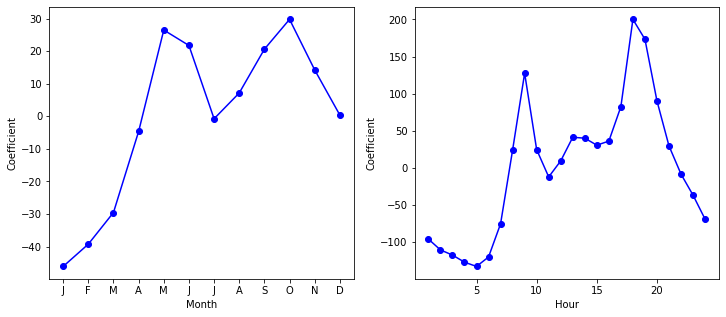

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(jan_to_dec_coef, marker='o', color='b')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Coefficient')
ax[0].set_xticks(ticks=np.arange(1,13), labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

ax[1].plot(all_hour_coef, marker='o', color='b')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Coefficient')
ax[1].set_xticks(ticks=np.arange(5,24,5));

### Poisson

In [117]:
poison_model = smf.glm(formula = "bikers ~ C(mnth, Sum) + C(hr, Sum) + workingday + temp + C(weathersit, Treatment)", data=bikeshare_copy, family=sm.families.Poisson())
poisson_fit = poison_model.fit()

In [118]:
poisson_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4054e+05
Date:                Tue, 05 Jul 2022   Deviance:                   2.2804e+05
Time:                        23:44:19   Pearson chi2:                 2.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       4.1182      0.006    683.963      0.000       4.106       4.130
C(mnth, Sum)[S.1]                              -0.6702      0.006   -113.445      0.000      -0.682      -0.659
C(mnth, Sum)[S.2]                              -0.4441      0.005    -91.379      0.000      -0.454      -0.435
C(mnth, Sum)[S.3]                              -0.2937      0.004    -70.886      0.000      -0.302      -0.286
C(mnth, Sum)[S.4]                               0.0215      0.003      6.888      0.000       0.015       0.028
C(mnth, Sum)[S.5]                               0.2405      0.003     82.462      0.000       0.235       0.246
C(mnth, Sum)[S.6]                               0.2232      0.004     62.818      0.000       0.216       0.230
C(mnth, Sum)[S.7]                               0.1036      0.004     25.121      0.000       0.096       0.112
C(mnth, Sum)[S.8]                               0.1512      0.004     41.281      0.000       0.144       0.158
C(mnth, Sum)[S.9]                               0.2335      0.003     75.281      0.000       0.227       0.240
C(mnth, Sum)[S.10]                              0.2676      0.003     96.091      0.000       0.262       0.273
C(mnth, Sum)[S.11]                              0.1503      0.003     47.248      0.000       0.144       0.156
C(hr, Sum)[S.1]                                -0.7544      0.008    -95.744      0.000      -0.770      -0.739
C(hr, Sum)[S.2]                                -1.2260      0.010   -123.173      0.000      -1.245      -1.206
C(hr, Sum)[S.3]                                -1.5631      0.012   -131.702      0.000      -1.586      -1.540
C(hr, Sum)[S.4]                                -2.1983      0.016   -133.846      0.000      -2.230      -2.166
C(hr, Sum)[S.5]                                -2.8305      0.023   -125.586      0.000      -2.875      -2.786
C(hr, Sum)[S.6]                                -1.8147      0.013   -134.775      0.000      -1.841      -1.788
C(hr, Sum)[S.7]                                -0.4299      0.007    -62.341      0.000      -0.443      -0.416
C(hr, Sum)[S.8]                                 0.5752      0.004    130.544      0.000       0.567       0.584
C(hr, Sum)[S.9]                                 1.0769      0.004    302.220      0.000       1.070       1.084
C(hr, Sum)[S.10]                                0.5818      0.004    135.727      0.000       0.573       0.590
C(hr, Sum)[S.11]                                0.3369      0.005     71.372      0.000       0.328       0.346
C(hr, Sum)[S.12]                                0.4941      0.004    112.494      0.000       0.486       0.503
C(hr, Sum)[S.13]                                0.6796     

In [119]:
jan_to_nov_coef = poisson_fit.params[1:12]
dec_coef = -sum(jan_to_nov_coef)
jan_to_dec_coef = pd.concat([jan_to_nov_coef, pd.Series(dec_coef, index=["C(mnth, Sum)[S.12]"])])

jan_to_dec_coef.index = np.arange(1,13)

In [121]:
first_23_hour_coef = poisson_fit.params[12:13+22]
last_hour_coef = -sum(first_23_hour_coef)
all_hour_coef = pd.concat([first_23_hour_coef, pd.Series(last_hour_coef, index=["C(hr, Sum)[S.23]"])])

all_hour_coef.index = np.arange(1,25)

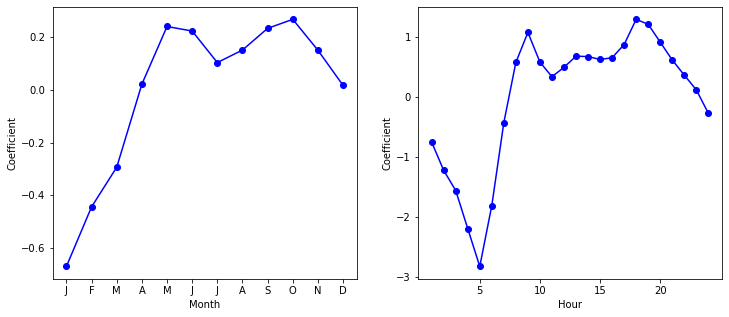

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(jan_to_dec_coef, marker='o', color='b')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Coefficient')
ax[0].set_xticks(ticks=np.arange(1,13), labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

ax[1].plot(all_hour_coef, marker='o', color='b')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Coefficient')
ax[1].set_xticks(ticks=np.arange(5,24,5));

In [123]:
poisson_fit.predict()

array([ 17.85276764,  10.96665932,   7.82788338, ..., 123.12777547,
        94.7108554 ,  63.09432714])

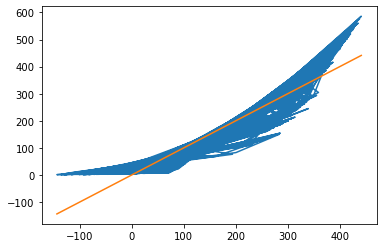

In [133]:
plt.plot(linear_fit2.predict(), poisson_fit.predict())
x = np.linspace(min(linear_fit2.predict()), max(linear_fit2.predict()), 100)
y = x
plt.plot(x, y);